# Laboratorio 1 - Preparación y Visualización de Datos

## Grupo 1 - Paula Hípola Gómez, José Ignacio Navas Sanz y Belén Ortega Pérez

## Entregable 2 - Netflix

### 2.1- Confirma o desmiente la hipótesis de que las series han desbancado a las películas en la oferta de Netflix.

### Procesando los datos

In [1]:
%config IPCompleter.greedy=True
%reset
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

#Deberiamos analizar el numero de películas vs el numero de serie....
#Importamos el CSV de Netflix
df_netflix = pd.read_csv('netflix.csv')
#Visualizamos los datos
df_netflix.head()

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


### Limpieza y preprocesamiento de datos

In [2]:
#Preprocesamiento de datos
#Miramos si hay peliculas o series faltantes (Sin Titulo)
titulos = df_netflix['title']
print('Hay',titulos.isnull().sum(),'datos sin título')

#Miramos si hay peliculas repetidas
titulosDuplicados = df_netflix.duplicated().sum()
print('Hay',titulosDuplicados,'duplicados')

#Tamaño del dataset
print('El Dataset tiene',df_netflix.shape[0],'instancias y',df_netflix.shape[1],'atributos');

#Sacamos los diferentes tipos
tipos = df_netflix["type"]
print('Los valores para clasiicar en el dataset disponibles son:',set(tipos))

Hay 0 datos sin título
Hay 0 duplicados
El Dataset tiene 6234 instancias y 12 atributos
Los valores para clasiicar en el dataset disponibles son: {'TV Show', 'Movie'}


### Obteniendo Resultados

In [3]:
#Numero de peliculas
peliculas = tipos[tipos=="Movie"].count()
#Numeros de series
series = tipos[tipos=="TV Show"].count()

#Resultados
print('En el Dataset hay',peliculas,'peliculas y',series,'series')
print('Para comprobar si hay algo diferente de pelicula o serie, sumamos el numero de ambas')

#Suma de peliculas y series. Deberá ser igual al número total de instancias del dataset
pelisYSeries = peliculas+series

#Comprobamos que solo haya peliculas y series
if pelisYSeries == tipos.shape[0]:
    print('Hay solo datos de películas y series, no hay ninguna etiqueta más para tipificar')
else:
    print('Hay otro tipo de etiqueta diferente a TV Show o Movie')

En el Dataset hay 4265 peliculas y 1969 series
Para comprobar si hay algo diferente de pelicula o serie, sumamos el numero de ambas
Hay solo datos de películas y series, no hay ninguna etiqueta más para tipificar


### 2.1.1- (1 punto) Encuentra el número de películas vs número de series disponibles totales ¿Qué porcentaje del contenido representa cada categoría? Muéstralo en un gráfico justificando la elección del tipo de gráfico.

### Películas VS Series en Netflix

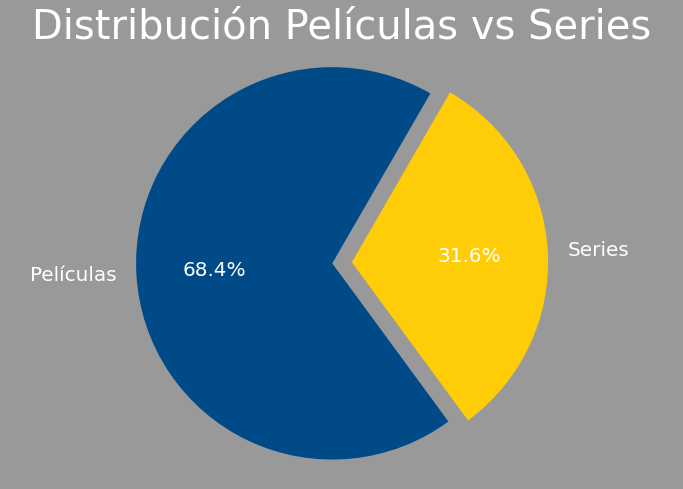

In [4]:
#Hemos encontrado que hay 4265 peliculas y 1969 series
#PieChart
labels = 'Películas','Series'
sizes = [peliculas,series]
colors = ['#004B87', '#FFCD07']

plt.rcParams['font.size'] = 20
fig1, ax1 = plt.subplots(figsize=(12,8),facecolor='#999999')
ax1.pie(sizes, explode=(0,0.1), labels=labels, autopct='%1.1f%%', 
        shadow=False, startangle=60, textprops={'color':"w"}, colors=colors)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribución Películas vs Series',fontsize=40, color='w')
plt.savefig('PieChartPelisvsSeries.png',facecolor=fig1.get_facecolor(), transparent=False)
plt.show()

En este gráfico de tarta, podemos observar las proporciones que conforman el conjunto de Series y Películas de la plataforma Netflix. Hemos escogido este tipo de gráfico debido a que únicamente pretendemos comunicar la magnitud de cada uno de los atributos y con esta gráfica se transmite con perfecta claridad la relación entre ambos.

### 2.1.2- (1 punto) Estudia el número de películas vs número de series disponibles por año de publicación en Netflix. Para eso, crea un gráfico que muestre la evolución temporal (por años) de la cantidad de series y de películas disponibles en la plataforma. Justifica el gráfico elegido y explica la tendencia que observas en los datos. ¿Qué conclusión puedes extraer?

In [5]:
#Dataframe con - Tipo / Titulo / Año de Publicacion / Año de lanzamiento en Netflix
df_Netflix2 = df_netflix[['type','title','release_year','date_added']]

#Borramos los valores nulos
print('Valores Nulos\n')
print(df_Netflix2.isnull().sum())

#Realmente no necesitamos el título, si bien, nos ayuda a entender los datos mejor
#Borramos los datos donde no haya valores, ya que si no sabemos cuando se publicó esa película no podemos analizarla
df_Netflix2 = df_Netflix2.dropna()
print('\nValores Nulos tras limpiar\n')
print(df_Netflix2.isnull().sum())

#Borramos Duplicados
df_Netflix2 = df_Netflix2.drop_duplicates()

#Ahora cogemos los años de publicacion en Netflix
fechaRelease = df_Netflix2[['date_added']]

#Nos quedamos solo con el año
years = fechaRelease['date_added'].apply(str).str[-4:]

df_Netflix2['date_added'] = years

years = np.sort(years.unique())

pelisTotales = 0
seriesTotales = 0
numAnios = 0;

arrayPelis = []
arraySeries = []

for year in years:
    pelisPorAnio = df_Netflix2[(df_Netflix2['type'] == 'Movie') & (df_Netflix2['date_added'] == year)]
    seriesPorAnio = df_Netflix2[(df_Netflix2['type'] == 'TV Show') & (df_Netflix2['date_added'] == year)]
    print('En el año\033[1m',year,'\033[0mNetflix lanzó\033[1m',pelisPorAnio.shape[0],'películas\033[0m y\033[1m',seriesPorAnio.shape[0],'series\033[0m')
    pelisTotales += pelisPorAnio.shape[0]
    seriesTotales += seriesPorAnio.shape[0]
    arrayPelis.append(pelisPorAnio.shape[0])
    arraySeries.append(seriesPorAnio.shape[0])
    numAnios += 1

Valores Nulos

type             0
title            0
release_year     0
date_added      11
dtype: int64

Valores Nulos tras limpiar

type            0
title           0
release_year    0
date_added      0
dtype: int64
En el año 2008 Netflix lanzó 1 películas y 1 series
En el año 2009 Netflix lanzó 2 películas y 0 series
En el año 2010 Netflix lanzó 1 películas y 0 series
En el año 2011 Netflix lanzó 13 películas y 0 series
En el año 2012 Netflix lanzó 4 películas y 3 series
En el año 2013 Netflix lanzó 6 películas y 6 series
En el año 2014 Netflix lanzó 19 películas y 6 series
En el año 2015 Netflix lanzó 58 películas y 32 series
En el año 2016 Netflix lanzó 264 películas y 192 series
En el año 2017 Netflix lanzó 913 películas y 387 series
En el año 2018 Netflix lanzó 1290 películas y 492 series
En el año 2019 Netflix lanzó 1545 películas y 803 series
En el año 2020 Netflix lanzó 147 películas y 37 series


### Pintando los datos

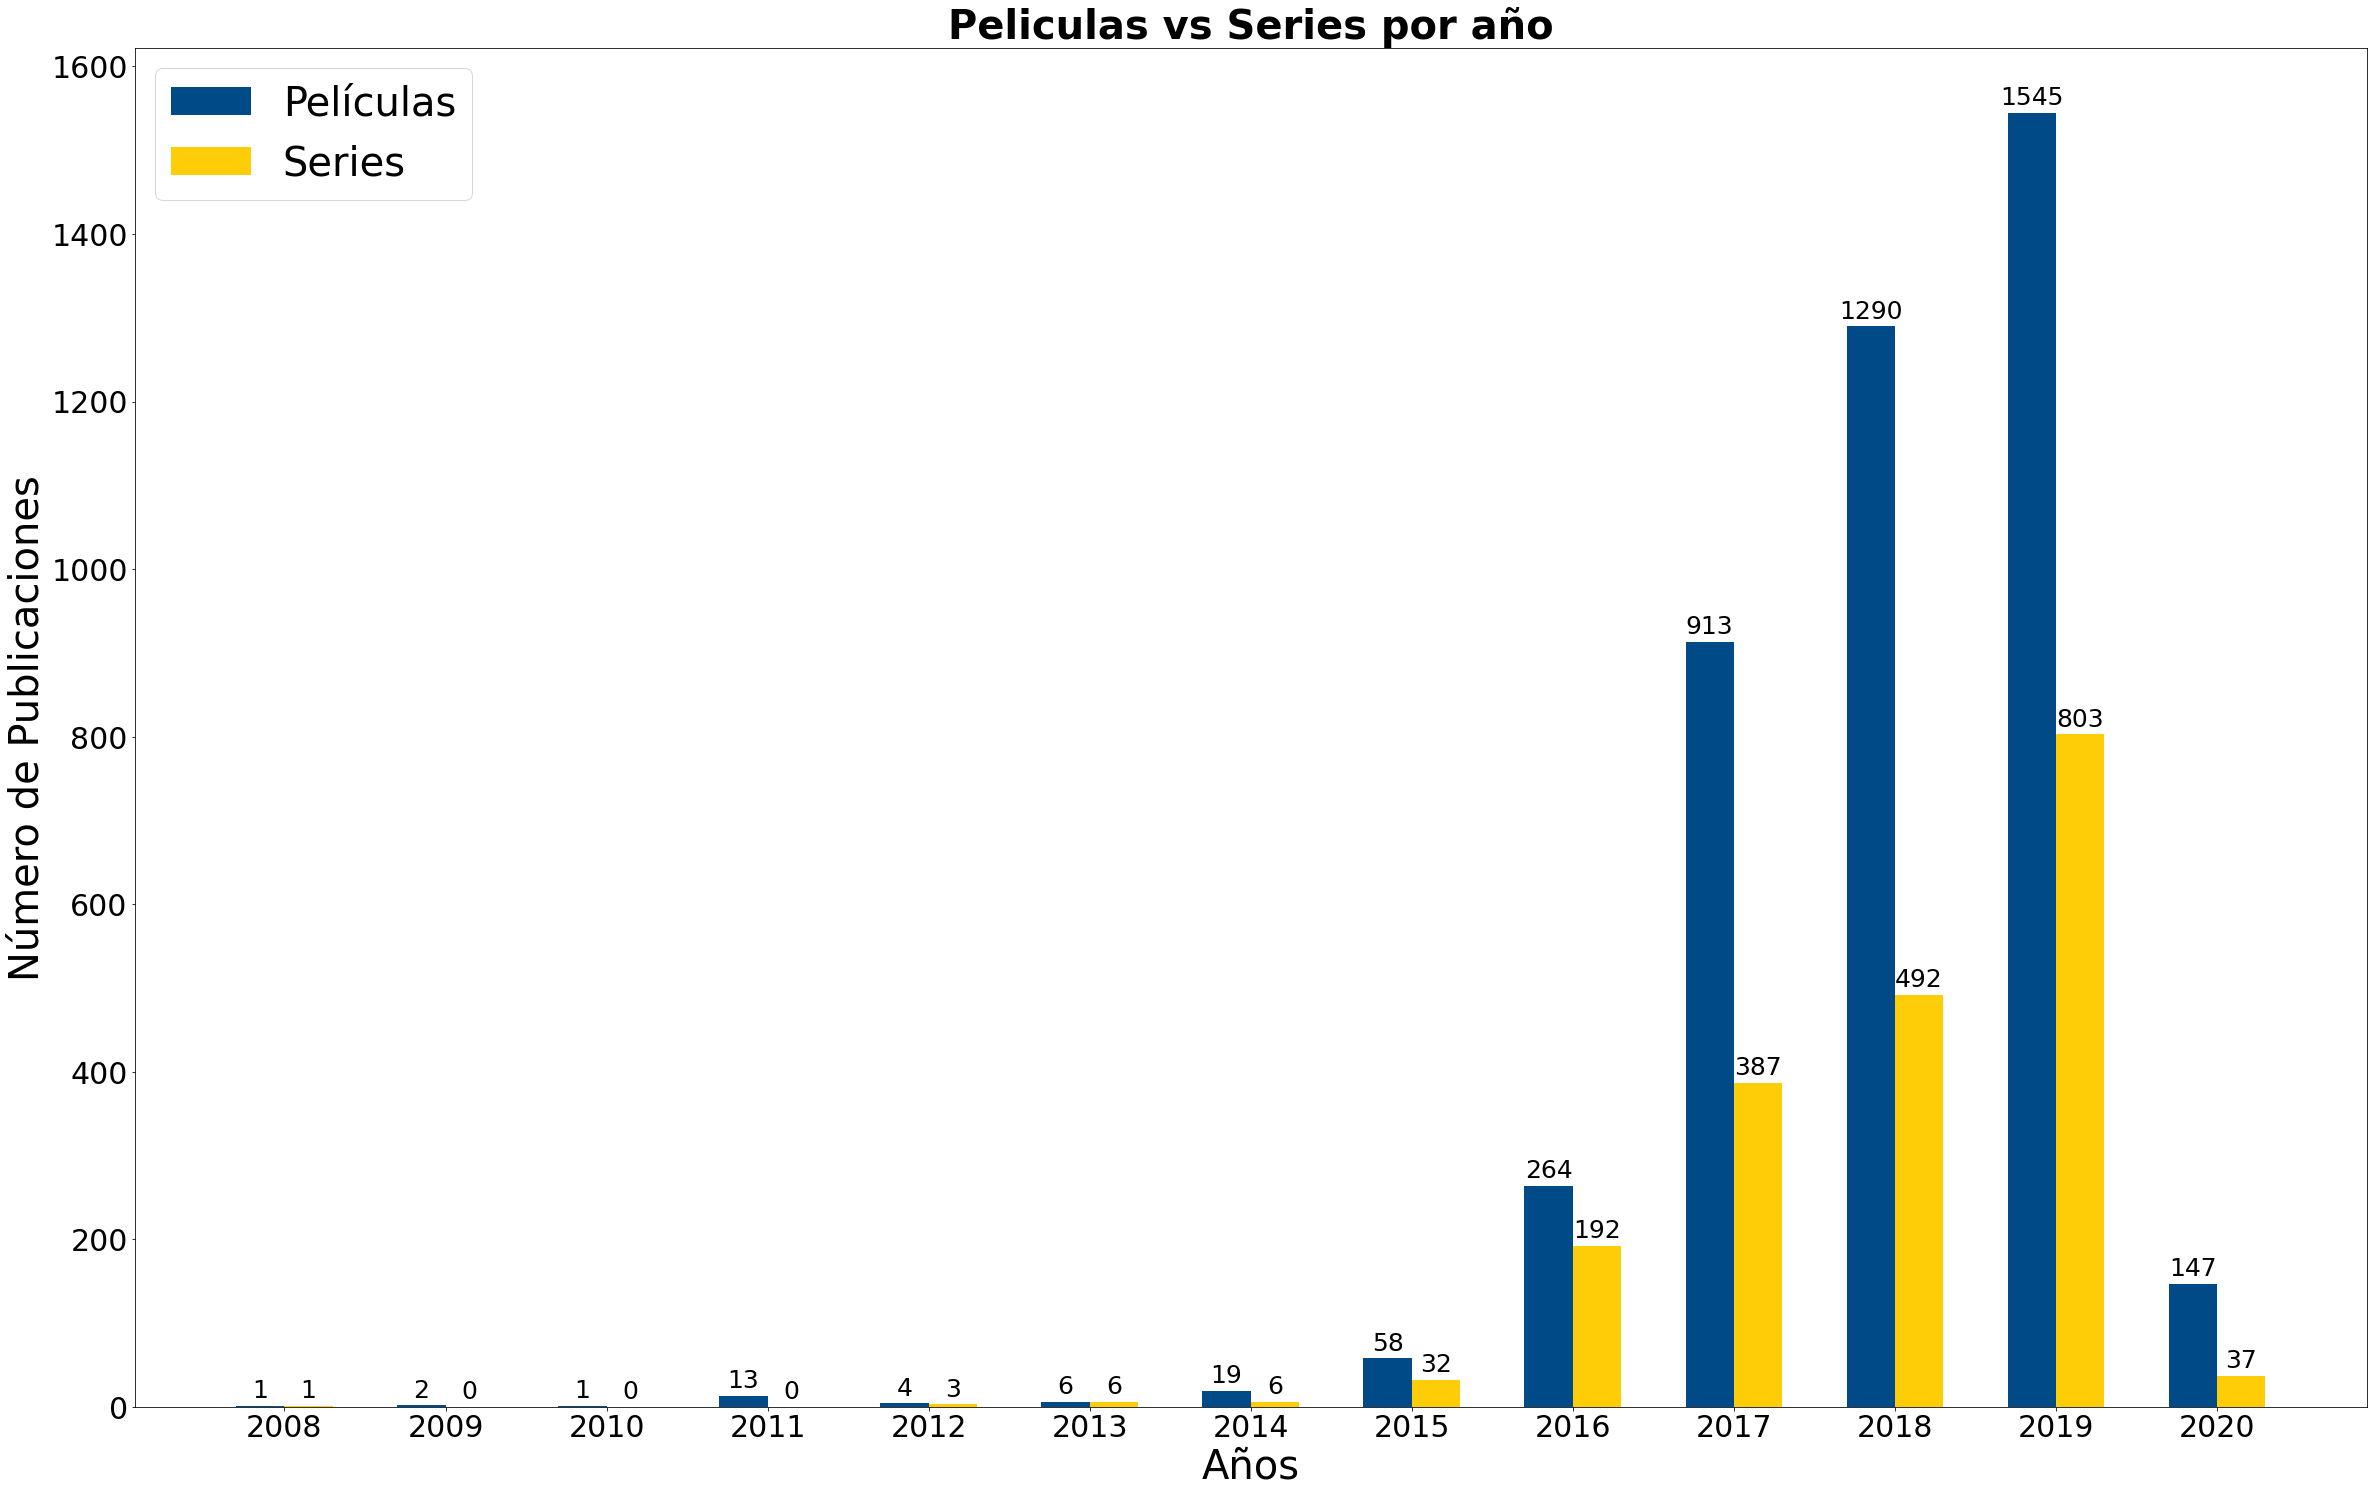

In [6]:
labels = years
pelis = arrayPelis
series = arraySeries

x = np.arange(len(labels))  # the label locations
width = .3  # the width of the bars

fig, ax = plt.subplots(figsize=(40,25))
rects1 = ax.bar(x - width/2, pelis, width, color = '#004B87', label='Películas')
rects2 = ax.bar(x + width/2, series, width, color = '#FFCD07', label='Series')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Número de Publicaciones',fontsize=40)
ax.set_title('Peliculas vs Series por año',fontsize=40, fontweight='bold')
ax.set_xlabel('Años',fontsize=40)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=30)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',fontsize=25)

autolabel(rects1)
autolabel(rects2)

plt.legend(fontsize=40)
plt.yticks(fontsize=30)

plt.savefig('PelisvsSeriesYearly.png')

plt.show()

Si nos fijamos en la gráfica de barras representada anteriormente, podemos ver una mayor evolución en la publicación de contenido que ha tenido la plataforma en los últimos 5 años. Mientras que los primeros años, se da una tendencia muy baja en la publicación de contenido en la plataforma, tanto de películas como de series, pero lo que más nos llama la atención es que en los inicios no se publicaron apenas series y es el 2015 cuando podemos ver como comienza a haber un crecimiento de estas. 

El motivo principal por el que se ha escogido este tipo de gráfico, es que nos permite tanto comparar las series vs películas publicadas anualmente, como visualizar el crecimiento de las publicaciones a lo largo de los años.

### 2.2- (0.5 puntos) Estudia la viabilidad de la plataforma Netflix ¿se sigue añadiendo contenido o hay una tendencia a la baja? Es decir, ¿la plataforma sigue creciendo o se pueden apreciar signos de desaceleración?

### Para esto muestra la cantidad de contenido añadido a la plataforma por años. Justifica el gráfico elegido y explica la tendencia observada.

#### Pintamos los datos

Publicaciones de Netflix en 2008  ->  2
Publicaciones de Netflix en 2009  ->  2
Publicaciones de Netflix en 2010  ->  1
Publicaciones de Netflix en 2011  ->  13
Publicaciones de Netflix en 2012  ->  7
Publicaciones de Netflix en 2013  ->  12
Publicaciones de Netflix en 2014  ->  25
Publicaciones de Netflix en 2015  ->  90
Publicaciones de Netflix en 2016  ->  456
Publicaciones de Netflix en 2017  ->  1300
Publicaciones de Netflix en 2018  ->  1782
Publicaciones de Netflix en 2019  ->  2348
Publicaciones de Netflix en 2020  ->  184


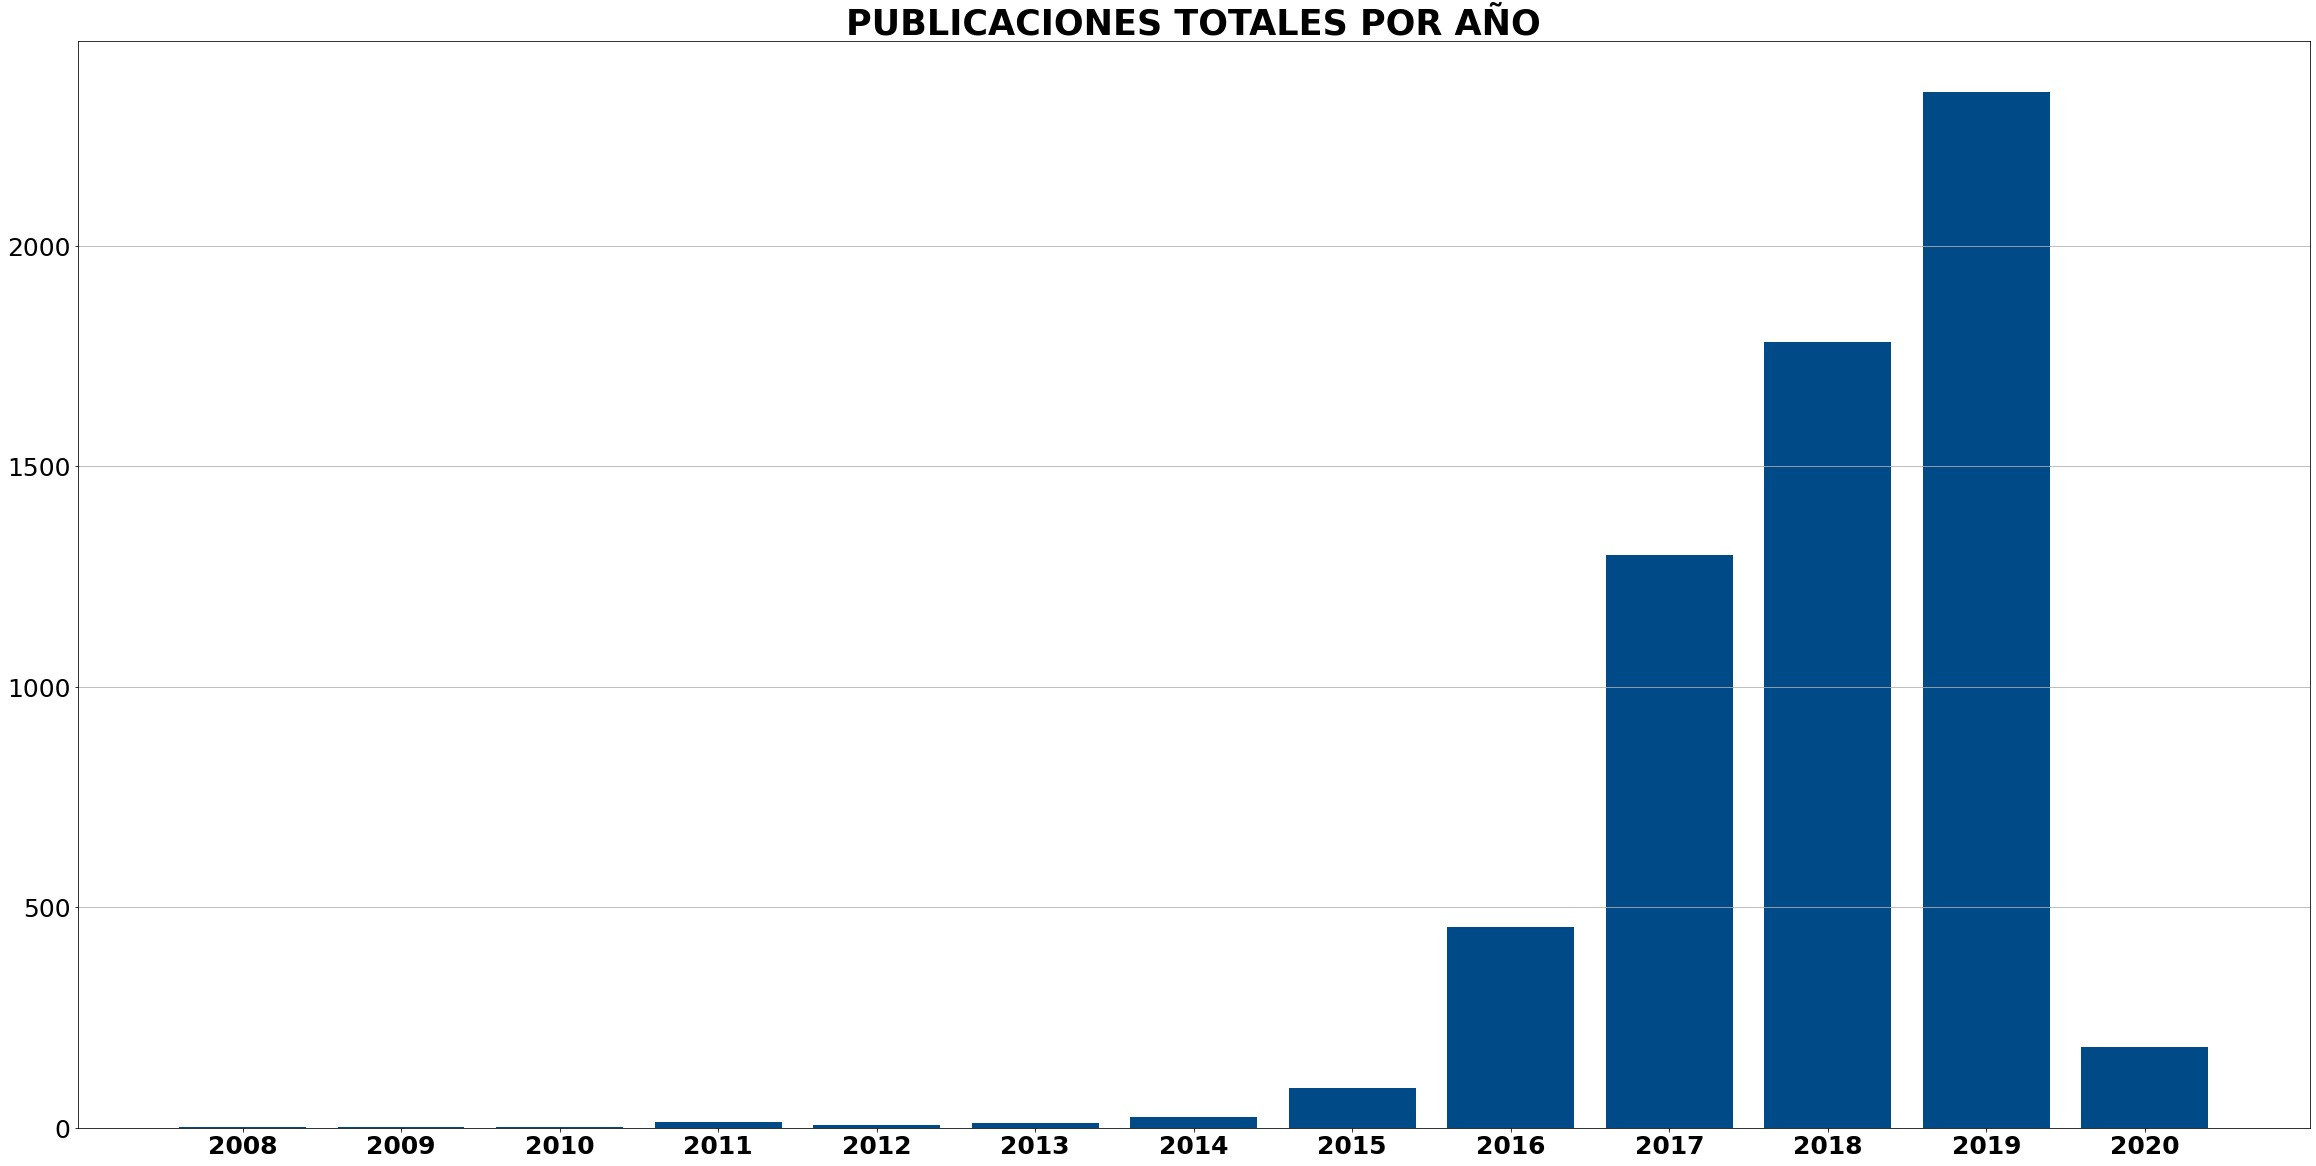

In [7]:
#Debemos mirar si sumando peliculas y series por años, se han ido añadiendo más o menos contenidos
arrayTotal = []

#Para cada uno de los años
for year in years:
    pelisPorAnio = df_Netflix2[(df_Netflix2['type'] == 'Movie') & (df_Netflix2['date_added'] == year)]
    seriesPorAnio = df_Netflix2[(df_Netflix2['type'] == 'TV Show') & (df_Netflix2['date_added'] == year)]
    arrayTotal.append(pelisPorAnio.shape[0] + seriesPorAnio.shape[0])
    numAnios += 1

itera = 0;    
for x in range(len(years)):
    print('Publicaciones de Netflix en',years[x],' -> ',arrayTotal[x])


height = arrayTotal
bars = years
posiciones = np.arange(len(bars))

plt.figure(figsize=(40, 20))

# Create bars
plt.bar(posiciones, height, color='#004B87')
 
# Create names on the x-axis
plt.xticks(posiciones, bars, fontsize=25, fontweight='bold')
plt.yticks(fontsize=25)

plt.title('PUBLICACIONES TOTALES POR AÑO', fontsize=35, fontweight='bold')

plt.savefig('totalReleasesYearly.png')

plt.grid(b=True, which='major', axis='y')

# Show graphic
plt.show()

De acuerdo a la trayectoria visible a través del gráfico, hay una clara tendencia positiva respecto a las publicaciones hechas desde el comienzo de la plataforma. Sin embargo, nos topamos con un caso anómalo en el 2020, la hipotesis que barajamos, es que el dataset ha sido completado a mediados o principios de este año, coincidiendo además con la crisis mundial que se está sufriendo debido al COVID-19 que ha podido retrasar muchos de los estrenos en la plataforma debido a retrasos en las producciones. Para sacar alguna conclusión más definitiva, podemos afirmar que el contenido de Netflix ha ido creciendo si bien en este último 2020 no se da ese hecho pero como hemos dicho puede ser por la pandemia de COVID-19 que asola a todo el planeta, porque el dataset haya sido realizado hasta el primer trimestre de 2020 o bien por ambas.

### 2.3-Estudio del momento de aparición del contenido en Netflix. 

### 2.3.1-(1 punto) ¿Cuál es el retraso medio en publicar una película en Netflix? ¿Y para una serie? ¿hay variación en este retraso a lo largo de los años? Visualiza los datos utilizando los gráficos más adecuados justificando su elección.¿Crees que este reflejo de la actividad de la plataforma es un indicativo de su viabilidad y proyección? Justifica la respuesta preferiblemente apoyándote en los datos. 

In [8]:
df = df_Netflix2[(df_Netflix2['type'] == 'Movie')]
#Eliminamos las duplicadas
df = df.drop_duplicates()
df = df.dropna()
peliculas = df
peliculas['date_added'] = df['date_added'].apply(int)

print('Tenemos',df.shape[0],'películas')

aniosDifPeliculas = []

for pelicula in peliculas.values:
    dif = pelicula[3]-pelicula[2]
    aniosDifPeliculas.append(dif)

mediaPelis = sum(aniosDifPeliculas)/len(aniosDifPeliculas)

print('La media de retraso de publicacion de películas en Netflix es de:',round(mediaPelis,2),'años')

df = df_Netflix2[(df_Netflix2['type'] == 'TV Show')]
#Eliminamos las duplicadas
df = df.drop_duplicates()
df = df.dropna()
series = df
series['date_added'] = df['date_added'].apply(int)

print('Tenemos',df.shape[0],'series')

aniosDifSeries = []

for serie in series.values:
    dif = serie[3]-serie[2]
    aniosDifSeries.append(dif)

mediaSeries = sum(aniosDifSeries)/len(aniosDifSeries)

print('La media de retraso de publicacion de series en Netflix es de:',round(mediaSeries,2),'años') 

Tenemos 4263 películas
La media de retraso de publicacion de películas en Netflix es de: 5.64 años
Tenemos 1958 series
La media de retraso de publicacion de series en Netflix es de: 2.41 años


#### Retraso medio por año para películas y series en la plataforma

In [9]:
#Variacion a lo largo de los años en la publicacion de series y peliculas
#Debemos comparar el retraso para cada año de publicación, es decir, para cada año diferente,
#comprobar el retraso de las publicaciones de ese año

#Pasamos los años que tenemos a integer, tenemos una lista de strings
anios = list(map(int, years))

#Definimos los arrays para almacenar el retraso medio por años
retrasosSeries = []
retrasosPelis = []

print('--------------------------------------------------------------------------')
#Para cada año, buscaremos las series y las peliculas y compararemos el año vs el año de lanzamiento de la peli o serie
for anio in anios:
    #Cogemos las series para el año actual
    seriesAnio = series[(series['date_added'] == anio)]
    #Cogemos las películas para el año actual
    pelisAnio = peliculas[(peliculas['date_added'] == anio)]
    #Si hay series para ese año
    if seriesAnio.shape[0] > 0:
        #Guardamos el año en el que se lanzaron las series
        anioLanzamiento = seriesAnio['release_year'].values
        #Restamos el año en el que estamos - el año que se lanzo la serie
        dif = anio - anioLanzamiento
        #La media sera la suma de diferencias de año entre las series de ese año
        media = dif.sum() / seriesAnio.shape[0];
        print('El \033[1mretraso anual\033[0m para las \033[1mseries en\033[0m el año\033[1m',
              anio,'\033[0mes de\033[1m',round(media,2),'años\033[0m')
        retrasosSeries.append(round(media,2))
    else:
        print('\033[1mEn',anio,'Netflix no publicó ninguna serie\033[0m en su plataforma')
        retrasosSeries.append(0)
    if pelisAnio.shape[0] > 0:
        #Guardamos el año en el que se lanzaron las series
        anioLanzamiento = pelisAnio['release_year'].values
        #Restamos el año en el que estamos - el año que se lanzo la película
        dif = anio - anioLanzamiento
        #La media sera la suma de diferencias de año entre las series de ese año
        media = dif.sum() / pelisAnio.shape[0];
        print('El \033[1mretraso anual\033[0m para las \033[1mpelículas en\033[0m el año\033[1m',
              anio,'\033[0mes de\033[1m',round(media,2),'años\033[0m')
        retrasosPelis.append(round(media,2))
    else:
        print('\033[1mEn',anio,'Netflix no publicó ninguna película\033[0m en su plataforma')
        retrasosPelis.append(0)
    print('--------------------------------------------------------------------------')



--------------------------------------------------------------------------
El retraso anual para las series en el año 2008 es de 1.0 años
El retraso anual para las películas en el año 2008 es de 2.0 años
--------------------------------------------------------------------------
En 2009 Netflix no publicó ninguna serie en su plataforma
El retraso anual para las películas en el año 2009 es de 1.0 años
--------------------------------------------------------------------------
En 2010 Netflix no publicó ninguna serie en su plataforma
El retraso anual para las películas en el año 2010 es de 23.0 años
--------------------------------------------------------------------------
En 2011 Netflix no publicó ninguna serie en su plataforma
El retraso anual para las películas en el año 2011 es de 19.92 años
--------------------------------------------------------------------------
El retraso anual para las series en el año 2012 es de 2.0 años
El retraso anual para las películas en el año 2012 es de 1

#### Representación gráfica de los datos

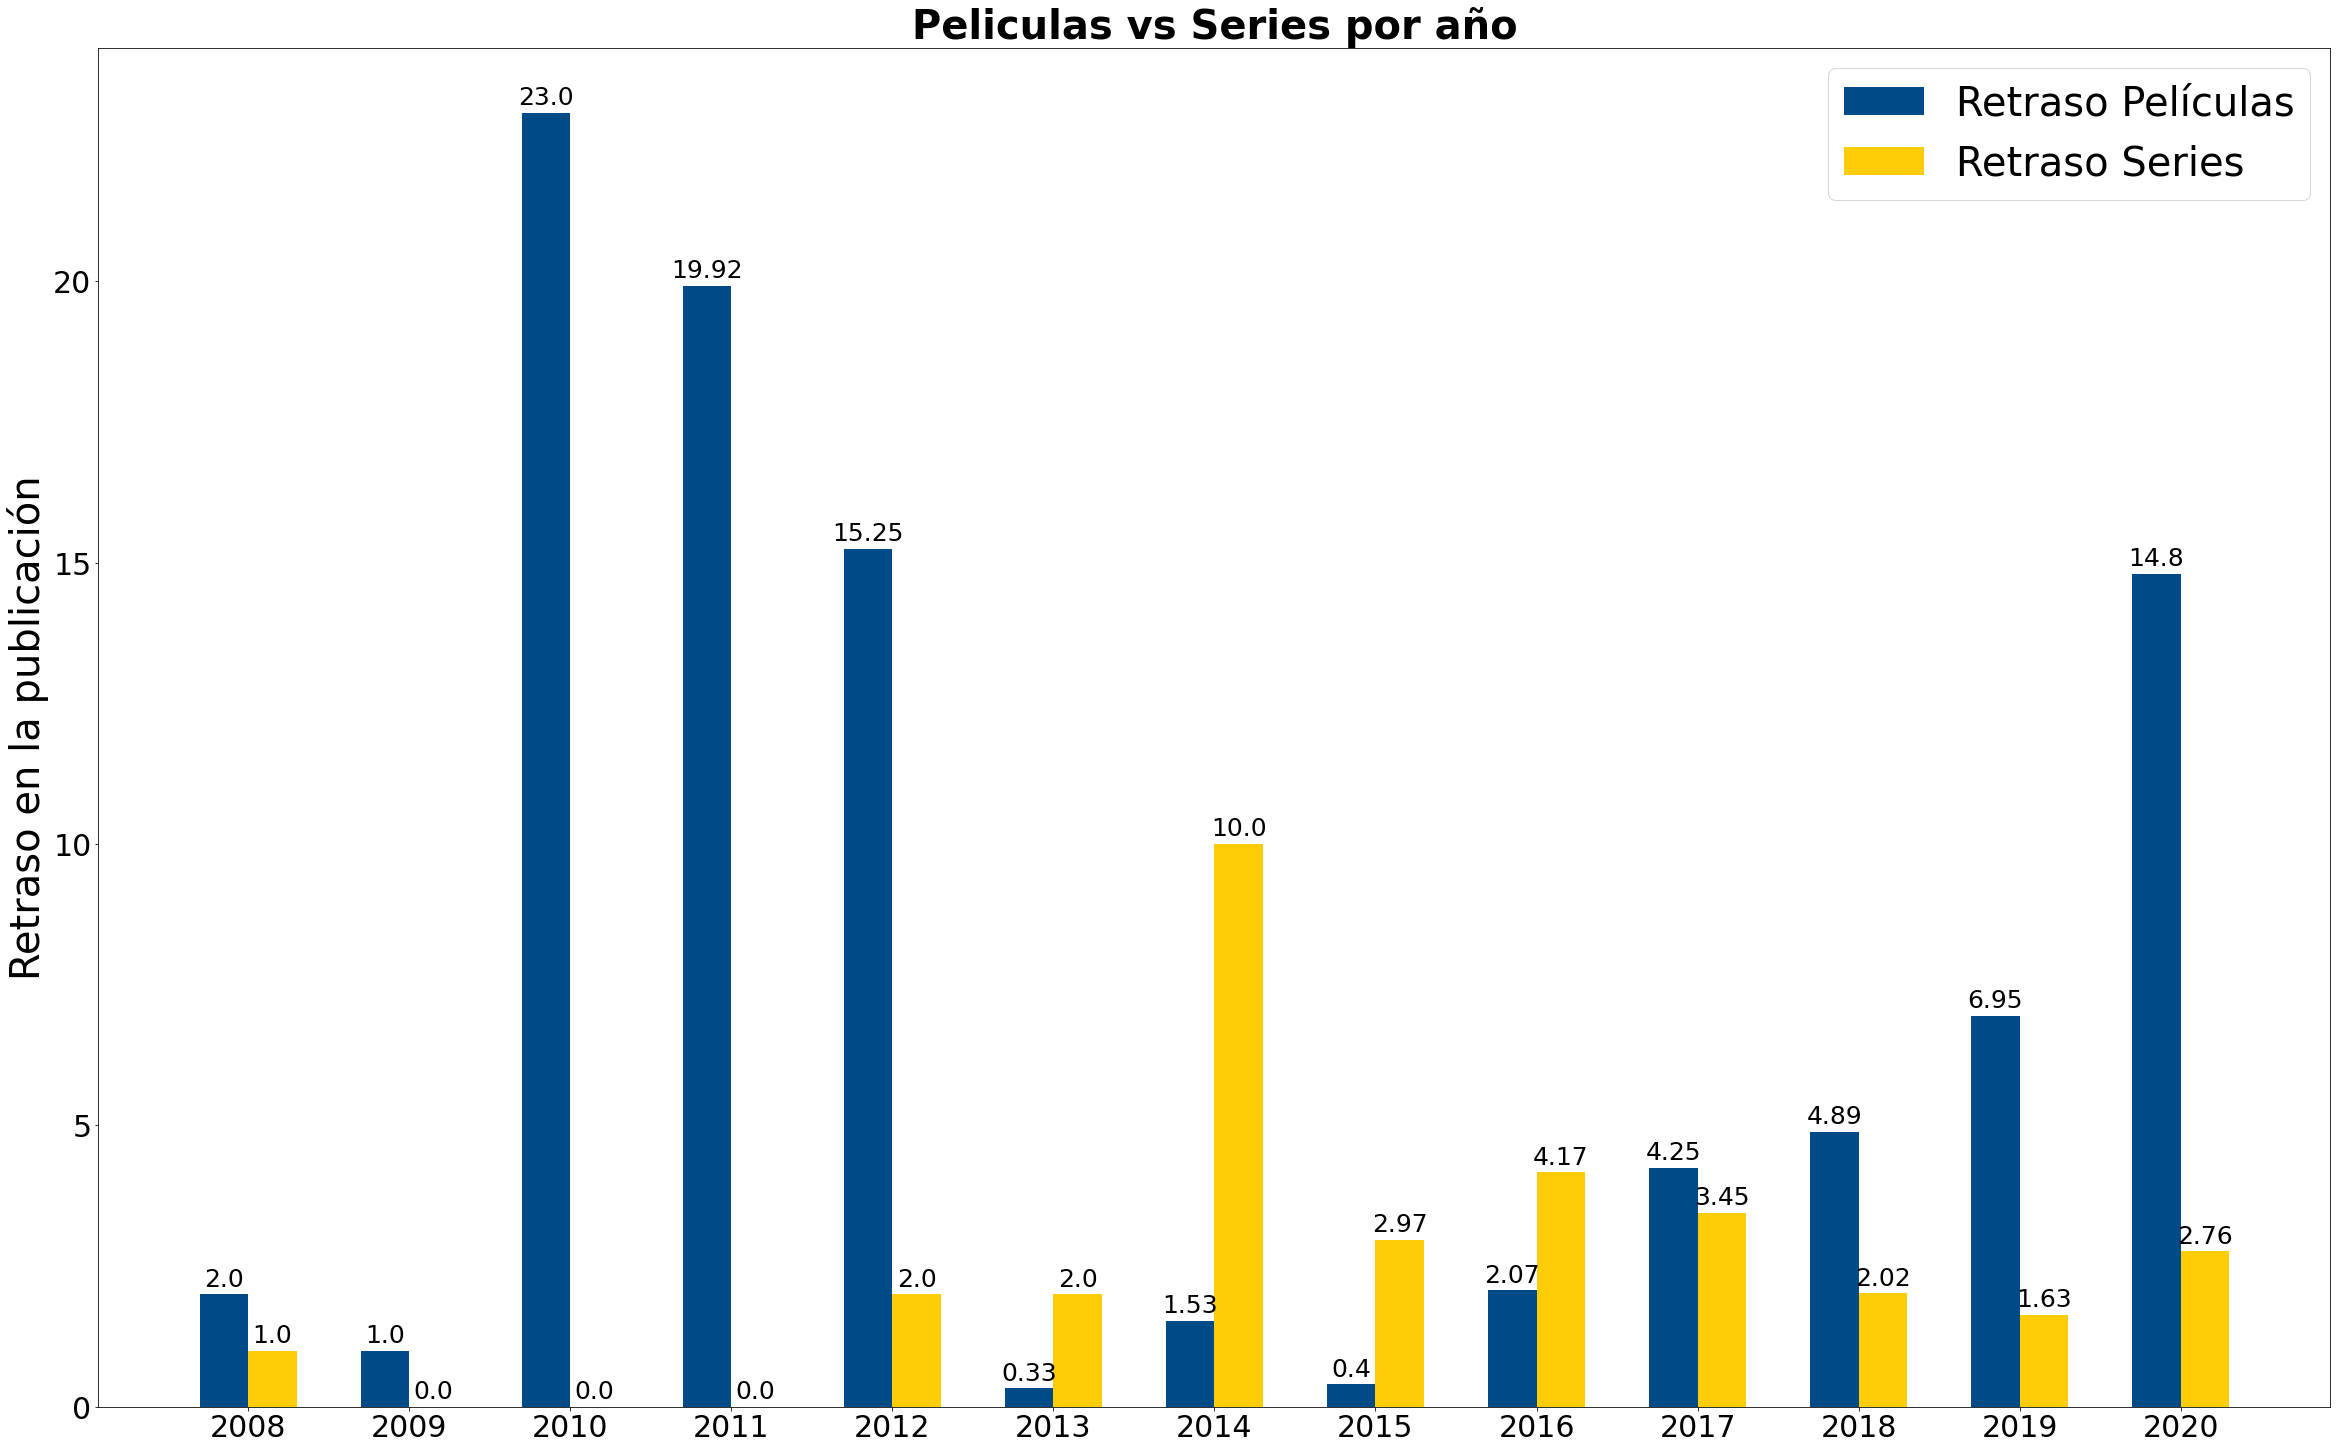

In [10]:
labels = anios
pelisLag = retrasosPelis
seriesLag= retrasosSeries

x = np.arange(len(labels))  # the label locations
width = .3  # the width of the bars

fig, ax = plt.subplots(figsize=(40,25))
rects1 = ax.bar(x - width/2, pelisLag, width, color = '#004B87', label='Retraso Películas')
rects2 = ax.bar(x + width/2, seriesLag, width, color = '#FFCD07', label='Retraso Series')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Retraso en la publicación',fontsize=40)
ax.set_title('Peliculas vs Series por año',fontsize=40, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=30)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',fontsize=25)

autolabel(rects1)
autolabel(rects2)

plt.legend(fontsize=40)
plt.yticks(fontsize=30)
plt.savefig('SeriesvsPelisYearly.png')
plt.show()

Esta gráfica representa el tiempo medio entre el estreno de una película o serie, y la obtención de los derechos de visualización por parte de Netflix y su estreno en la plataforma. No es posible que Netflix publique un contenido sin los derechos correspondientes, de ahí que se produzca un retraso entre la fecha de publicación y la de lanzamiento del contenido. 

Si hablamos de películas, el tiempo medio de retraso de estreno en la plataforma es de unos 5 años y medio, aunque no es un dato realmente útil, ya que, en los comienzos de la plataforma hay una gran aportación de películas estrenadas en cines muchos años antes, que puede deberse a un intento para captar una mayor clientela ofreciendo un catálogo más completo. Esto influye de manera negativa sobre la media. Respecto a los picos de aportación de películas a la plataforma vuelve a suceder en el 2020, donde aparece un pico bastante llamativo. Si investigamos algo más, esto puede resultar de la apertura de la plataforma de Disney+ y tratar de mantener la competitividad ante el lanzamiento de un servicio rival en el sector. También puede deberse que durante la pandemia de COVID-19 sufrida desde comienzos del año 2020, Netflix haya decidido alojar más contenido en su plataforma para entretener a más clientes.

En cuanto a las series tenemos un compartamiento algo diferente. Si bien al principio la aportación de series en la plataforma es prácticamente nula (recordemos que Netflix nació como un videoclub online), el pico más atípico se produce en 2014, lo cual puede deberse a que HBO fundó su ahora plataforma streaming HBO MAX. Esta plataforma contendría una de la series que más masas ha movilizado en estos ultimos años, "Juego de Tronos". Además, también posee los derechos sobre algunas las mejores series valoradas de todos los tiempos como "Los Soprano", "A dos metros bajo tierra", "Deadwood" o "Hermanos de sangre". Tras este pico, el resto de años se mantiene relativamente estable, obteniendo una media de alrededor de 2 años y medio en el estreno de las series en la plataforma una vez han sido lanzadas al mercado. Dado que muchas series tienen pocas temporadas, este dato puede estar condicionado a que una vez terminan las series, los canales venden los derechos a plataformas de visualización por demanda para seguir obteniendo beneficios de ellas. También puede suceder que los derechos los tengan otras plataformas y sea cuando les vence el contrato y es ahí cuando Netflix puede obtenerlas y publicarlas en su catálogo.

Respecto a las películas, no creemos que tenga ningún tipo de relación el año de estreno. El fenómeno de las series, en cambio, es bastante distinto, a la población le suele gustar comentar las series cuando están en emisión para poder ir sacando conclusiones o teorías conforme se van estrenando capítulos o se estrena la temporada completa. 
Además, el usuario suele demandar una serie completa, en lugar de ir viendo episodios semanales como sucedía antiguamente en los servicios de TV. Esto hace que la demanda por las series sea mayor que la de las películas, además que la duración de las mismas influye. No todo el mundo dispone de dos horas todos los dias para ver una película pero quizá si dispone de al menos una hora para poder ver un capítulo de la serie que esté viendo en ese momento.

De nuevo, hemos escogido el gráfico de barras para representar los datos ya que nos permite ver la evolución por años y comparar los datos entre series y películas de cada año de formas más cómoda y sencilla.

### 2.3.2-(1 punto) ¿Hay un momento preferido en el año para publicar un contenido? Es decir, ¿hay algún momento del año en el que se ponga más contenido disponible? Para averiguar esto, estudia la media de contenido publicado para cada mes durante el tiempo de vida de Netflix. ¿Hay diferencias si se trata de una película o de una serie? Utiliza de manera justificada los gráficos correspondientes para respaldar tus respuestas. 

### Visualizando los datos

In [11]:
#Necesitamos un dataframe con el tipo de contenido y la fecha de publicacion en Netflix
df_netflix3 = df_netflix[['title','type','date_added']]
#Visualizamos los datos
df_netflix3.head()

,title,type,date_added
0,Norm of the North: King Sized Adventure,Movie,"September 9, 2019"
1,Jandino: Whatever it Takes,Movie,"September 9, 2016"
2,Transformers Prime,TV Show,"September 8, 2018"
3,Transformers: Robots in Disguise,TV Show,"September 8, 2018"
4,#realityhigh,Movie,"September 8, 2017"


### Procesamiento de datos

In [12]:
#Borramos los valores nulos
df_netflix3 = df_netflix3.dropna()


#Ahora necesitamos quedarnos solo con el mes y el año en la fecha, eliminando el dia
meses_cast = df_netflix3['date_added'].apply(str)
meses_cast = meses_cast.replace(",","")
meses_cast = meses_cast.str.split(" ")

i = 0;
meses = []
for month in meses_cast:
    mes = month[0]
    anio = month[2]
    if(len(mes)==0):
        mes=month[1]
        anio = month[3]
    #print('El mes de publicacion para la fila',i,'es',mes,'y el año es',anio)
    datos = mes+', '+anio
    meses.append(datos)
    i = i+1;

### Agregando datos necesarios para mejor manipulación posterior

In [13]:
#Añadimos el mes y el año casteado al dataframe (Mes, Año)
df_netflix3['date_added'] = meses
soloMeses = []
soloAnios = []
for mes in meses:
    soloMeses.append(mes[:-6])
    soloAnios.append(mes[-4:])
#Nos quedamos con años y meses separados
#Reconstruimos el dataset con meses y años separados
df_netflix3['mes'] = soloMeses
df_netflix3['year'] = soloAnios
df_netflix3.head()

,title,type,date_added,mes,year
0,Norm of the North: King Sized Adventure,Movie,"September, 2019",September,2019
1,Jandino: Whatever it Takes,Movie,"September, 2016",September,2016
2,Transformers Prime,TV Show,"September, 2018",September,2018
3,Transformers: Robots in Disguise,TV Show,"September, 2018",September,2018
4,#realityhigh,Movie,"September, 2017",September,2017


In [14]:
#Separamos peliculas y series
peliculas = df_netflix3[df_netflix3['type'] == 'Movie']
datosPelis = pd.value_counts(peliculas['mes']).sort_index()
sortedDataPelis = pd.DataFrame({"months":[],"values":[]})
monthNumericP = []
for month in datosPelis.index:
    datetime_object = datetime.strptime(month, "%B")
    month_number = datetime_object.month
    monthNumericP.append(month_number)
    
sortedDataPelis['months'] = monthNumericP  
sortedDataPelis['values'] = datosPelis.values/len(years)
sortedDataPelis = sortedDataPelis.sort_values(by=['months'])

series = df_netflix3[df_netflix3['type'] == 'TV Show']
datosSeries = pd.value_counts(series['mes']).sort_index()
sortedDataSeries = pd.DataFrame({"months":[],"values":[]})

monthNumericS = []
for month in datosSeries.index:
    datetime_object = datetime.strptime(month, "%B")
    month_number = datetime_object.month
    monthNumericS.append(month_number)

sortedDataSeries['months'] = monthNumericS
sortedDataSeries['values'] = datosSeries.values/len(years)
sortedDataSeries = sortedDataSeries.sort_values(by=['months'])

### Media de películas publicadas mensualmente

In [15]:
sortedDataPelis.head()

,months,values
4,1,35.230769
3,2,20.230769
7,3,30.076923
0,4,23.692308
8,5,22.692308


### Media de series publicadas mensualmente

In [16]:
sortedDataSeries.head()

,months,values
4,1,11.692308
3,2,8.846154
7,3,12.307692
0,4,10.692308
8,5,10.230769


### Pintando los datos

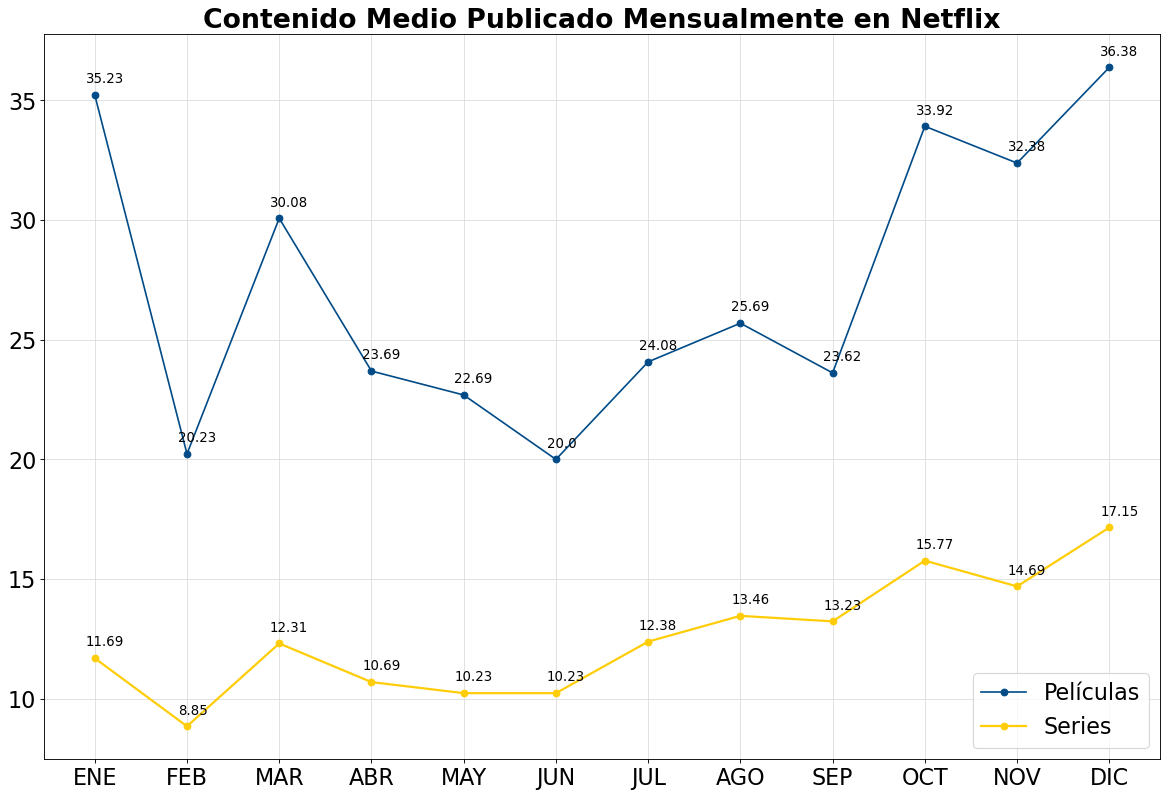

In [17]:
# Crear una figura de 8x6 puntos de tamaño, 80 puntos por pulgada
plt.figure(figsize=(18, 12), dpi=80)

# Crear una nueva subgráfica en una rejilla de 1x1
plt.subplot(1, 1, 1)

mesesLetra = ['ENE','FEB','MAR','ABR','MAY','JUN','JUL','AGO','SEP','OCT','NOV','DIC']

X = mesesLetra
Y1 = sortedDataPelis['values']
Y2 = sortedDataSeries['values']

plt.rcParams['font.size'] = 12

plt.plot(X, Y1, marker='o', color="#004B87", linewidth=1.5, linestyle="-")

i = 0;
for val in Y1:
    plt.text(i-0.1,val+0.5,round(val,2))
    i = i+1
    
i = 0;
for val in Y2:
    plt.text(i-0.1,val+0.5,round(val,2))
    i = i+1
    
plt.plot(X, Y2,  marker='o', color="#FFCD07", linewidth=2, linestyle="-")

plt.grid(color='#DEDEDE', linestyle='-')

plt.title('Contenido Medio Publicado Mensualmente en Netflix', fontsize=24, fontweight='bold')

plt.legend(['Películas','Series'],fontsize=20,loc=4)

# Guardar la figura usando 72 puntos por pulgada
plt.savefig("MonthlyData.png", dpi=60)
# Mostrar resultado en pantalla
plt.show()

Con la representación de los datos en un gráfico de lineas podemos observar con más fácilidad las fluctuaciones que se dan según la época para la subida de contenido. Como podemos ver, en el último cuatrimestre del año la publicación de contenido es mucho más alta que en el resto de meses y justo tras enero hay una gran bajada en la integración de contenido a la plataforma. Sin duda alguna, los meses favoritos para publicar contenido en Netflix son en Enero y Diciembre, siendo este último el que mayor registros tiene. El por qué de estos datos es relativo y no tenemos suficientes datos para hacernos a la idea de la razón real de esta distribución, en verano puede coincidir con que el consumidor se centra en series debido a la abundancia de tiempo y la posibilidad inmergirse durante más tiempo en un mismo "mundo". En cambio, la publicación de tantas películas en otoño puede deberse a la falta de tiempo o el comienzo del frío en el caso del hemisferio norte.  

En cuanto a las series, sucede más o menos lo mismo, desde junio empieza a haber una tendencia positiva en la publicación de contenidos, bajando de nuevo en febrero, teniendo un pequeño pico en Marzo para de nuevo tener una pequeña tendencia negativa hasta la llegada del verano. Es posible que este crecimiento en verano sea producido porque una gran parte del sector, como pueden ser los estudiantes, tienen más tiempo para consumir este tipo de producto debido a las vacaciones escolares.

Además, los rodajes y la posterior posproducción también tendrán cierta relación.

## Conclusión

#### En este entregable hemos aprendido, utilizando las técnicas de preprocesamiento de datos del Entregable 1 a implementar nuevas maneras de representar los datos. En este caso, hemos obtenido un dataset con datos de la plataforma Netflix y se nos pedía que comparasemos una serie de datos. Para hacer esto, en numerosas ocasiones hemos tenido que agrupar los datos por tipo (Películas o Series), por fechas, ya sea por meses o por años o incluso aunque no se solicitara, tener en cuenta por qué no, el género de las series y/o películas y estudiar cuáles son los más publicados o cómo evoluciona el mercado.

#### Este entregable tenía un poco de complejidad a la hora de tener en cuenta valores como los años. Hay muchos años en el dataset pero lo importante es a la hora de recorrerlos solamente jugar con valores únicos, es decir, si tenemos 50 apariciones del año 2008 por ejemplo, tenerlo en cuenta sólamente una vez.